<a href="https://colab.research.google.com/github/ronanmccormack-ca/ProgrammingforBigData/blob/main/Big%20Data%20Project/Yield%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
!tar xf spark-3.0.3-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"
import findspark
import pandas as pd
findspark.init()

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Yield Prediction")\
        .config('spark.ui.port','4050')\
        .getOrCreate()
spark

In [4]:
from pyspark.sql.functions import *

In [5]:
!git clone https://github.com/ronanmccormack-ca/ProgrammingforBigData.git

Cloning into 'ProgrammingforBigData'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 73 (delta 23), reused 35 (delta 3), pack-reused 0
Unpacking objects: 100% (73/73), done.


In [6]:
df = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/inventory_data.csv',header='true',inferSchema=True)

In [7]:
df.groupBy("batch_id","work_order_type_name",'substance_type_name').sum('measure_event_value')\
.where((col("work_order_type_name") == 'Drying')&(col("substance_type_name")=='Dried Cannabis')).orderBy('batch_id').show()

+--------+--------------------+-------------------+------------------------+
|batch_id|work_order_type_name|substance_type_name|sum(measure_event_value)|
+--------+--------------------+-------------------+------------------------+
|    7246|              Drying|     Dried Cannabis|                   55700|
|    9697|              Drying|     Dried Cannabis|                  130662|
|   15527|              Drying|     Dried Cannabis|                   51596|
|   15528|              Drying|     Dried Cannabis|                    1230|
|   15529|              Drying|     Dried Cannabis|                    1148|
|   15530|              Drying|     Dried Cannabis|                    2028|
|   15531|              Drying|     Dried Cannabis|                     967|
|   15532|              Drying|     Dried Cannabis|                    1123|
|   15533|              Drying|     Dried Cannabis|                    1845|
|   15534|              Drying|     Dried Cannabis|                    2679|

In [8]:
df.select('batch_id','cultivar_id','work_order_type_name','work_order_close_date','substance_type_name','measure_event_value')\
.orderBy('measure_event_value')\
.filter((col('batch_id')==9697)\
        &(col("work_order_type_name")=='Drying')\
        &(col("substance_type_name")=='Dried Cannabis'))\
.show()

+--------+-----------+--------------------+---------------------+-------------------+-------------------+
|batch_id|cultivar_id|work_order_type_name|work_order_close_date|substance_type_name|measure_event_value|
+--------+-----------+--------------------+---------------------+-------------------+-------------------+
|    9697|       4494|              Drying|   2021-07-15 9:39:40|     Dried Cannabis|             130662|
+--------+-----------+--------------------+---------------------+-------------------+-------------------+



In [9]:
df.select('batch_id','cultivar_id','work_order_type_name','work_order_close_date','substance_type_name','measure_event_value')\
.filter((col('cultivar_id')==4494)\
        &(col("work_order_type_name")=='Drying')\
        &(col("substance_type_name")=='Dried Cannabis'))\
.groupBy('batch_id','work_order_close_date').sum('measure_event_value')\
.show()

+--------+---------------------+------------------------+
|batch_id|work_order_close_date|sum(measure_event_value)|
+--------+---------------------+------------------------+
|    9697|   2021-07-15 9:39:40|                  130662|
|   15527|  2021-11-24 13:48:12|                   51596|
+--------+---------------------+------------------------+



In [10]:
co2_sensor_1_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/co2_sensor_1.csv',header='true',inferSchema=True)
lux_sensor_1_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/lux_sensor_1.csv',header='true',inferSchema=True)
temp_hum_sensor_1_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/temp_hum_sensor_1.csv',header='true',inferSchema=True)
co2_sensor_2_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/co2_sensor_2.csv',header='true',inferSchema=True)
lux_sensor_2_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/lux_sensor_2.csv',header='true',inferSchema=True)
temp_hum_sensor_2_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/temp_hum_sensor_2.csv',header='true',inferSchema=True)
co2_sensor_3_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/co2_sensor_3.csv',header='true',inferSchema=True)
lux_sensor_3_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/lux_sensor_3.csv',header='true',inferSchema=True)
temp_hum_sensor_3_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/temp_hum_sensor_3.csv',header='true',inferSchema=True)

In [122]:
batch_one = lux_sensor_1_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('lux_sensor_1_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  .join(lux_sensor_2_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('lux_sensor_2_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  ,on='datetype')\
  .join(lux_sensor_3_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('lux_sensor_3_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  ,on='datetype')\
  .join(co2_sensor_1_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('co2_sensor_1_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  ,on='datetype')\
  .join(co2_sensor_2_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('co2_sensor_2_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  ,on='datetype')\
  .join(co2_sensor_3_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('co2_sensor_3_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  ,on='datetype')\
  .join(temp_hum_sensor_1_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('temp_hum_sensor_1_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  ,on='datetype')\
  .join(temp_hum_sensor_2_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('temp_hum_sensor_2_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  ,on='datetype')\
  .join(temp_hum_sensor_3_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('temp_hum_sensor_3_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  ,on='datetype')\
  .sort('datetype',ascending=True)\
  .toPandas()

In [123]:
batch_two = lux_sensor_1_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('lux_sensor_1_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  .join(lux_sensor_2_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('lux_sensor_2_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  ,on='datetype')\
  .join(lux_sensor_3_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('lux_sensor_3_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  ,on='datetype')\
  .join(co2_sensor_1_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('co2_sensor_1_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  ,on='datetype')\
  .join(co2_sensor_2_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('co2_sensor_2_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  ,on='datetype')\
  .join(co2_sensor_3_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('co2_sensor_3_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  ,on='datetype')\
  .join(temp_hum_sensor_1_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('temp_hum_sensor_1_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  ,on='datetype')\
  .join(temp_hum_sensor_2_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('temp_hum_sensor_2_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  ,on='datetype')\
  .join(temp_hum_sensor_3_data.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('temp_hum_sensor_3_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  ,on='datetype')\
  .sort('datetype',ascending=True)\
  .toPandas()

In [124]:
batch_one['datetype'] = pd.to_datetime(batch_one['datetype'])
batch_two['datetype'] = pd.to_datetime(batch_two['datetype'])
batch_two = batch_two.set_index('datetype')
batch_one = batch_one.set_index('datetype')

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [127]:
X = sc.fit_transform(batch_two)
batch_two_norm = pd.DataFrame(X,columns=batch_two.columns)

In [128]:
X = sc.fit_transform(batch_one)
batch_one_norm = pd.DataFrame(X,columns=batch_one.columns)

In [120]:
#batch_two_norm = batch_two_norm.set_index(batch_two.index)
#batch_one_norm = batch_one_norm.set_index(batch_one.index)

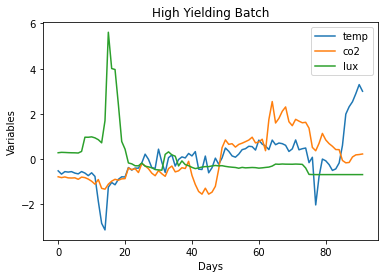

In [142]:
plt.plot(batch_one_norm.index, batch_one_norm['temp_hum_sensor_1_mean'], label = "temp")
plt.plot(batch_one_norm.index, batch_one_norm['co2_sensor_1_mean'], label = "co2")
plt.plot(batch_one_norm.index, batch_one_norm['lux_sensor_1_mean'], label = "lux")
plt.title('High Yielding Batch')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Variables')
plt.show()

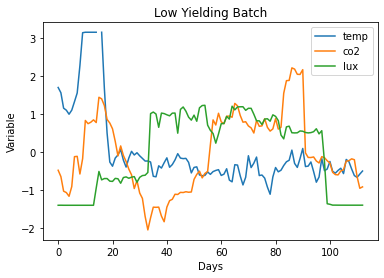

In [141]:
plt.plot(batch_two_norm.index, batch_two_norm['temp_hum_sensor_1_mean'], label = "temp")
plt.plot(batch_two_norm.index, batch_two_norm['co2_sensor_1_mean'], label = "co2")
plt.plot(batch_two_norm.index, batch_two_norm['lux_sensor_1_mean'], label = "lux")
plt.title('Low Yielding Batch')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Variable')
plt.show()

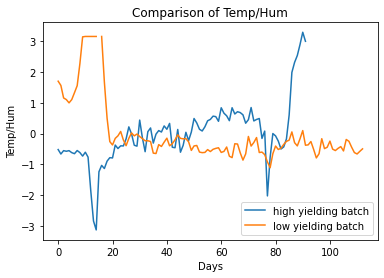

In [147]:
plt.plot(batch_one_norm.index, batch_one_norm['temp_hum_sensor_1_mean'], label = "high yielding batch")
plt.plot(batch_two_norm.index, batch_two_norm['temp_hum_sensor_1_mean'], label = "low yielding batch")
plt.title('Comparison of Temp/Hum')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp/Hum')
plt.show()

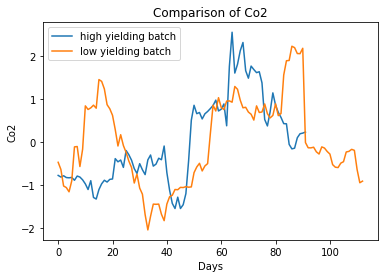

In [148]:
plt.plot(batch_one_norm.index, batch_one_norm['co2_sensor_1_mean'], label = "high yielding batch")
plt.plot(batch_two_norm.index, batch_two_norm['co2_sensor_1_mean'], label = "low yielding batch")
plt.title('Comparison of Co2')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Co2')
plt.show()

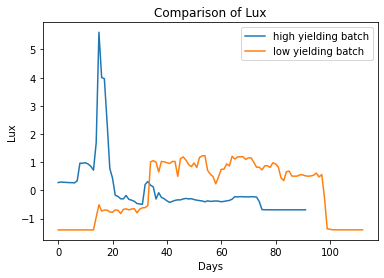

In [149]:
plt.plot(batch_one_norm.index, batch_one_norm['lux_sensor_1_mean'], label = "high yielding batch")
plt.plot(batch_two_norm.index, batch_two_norm['lux_sensor_1_mean'], label = "low yielding batch")
plt.title('Comparison of Lux')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Lux')
plt.show()